<a href="https://colab.research.google.com/github/jacmal/MachineLearning_Regression_Models/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
import requests
import io

url="https://raw.githubusercontent.com/jacmal/MachineLearning_Regression_Models/main/data_sets/Position_Salaries.csv"
site = requests.get(url).content
dataset = pd.read_csv(io.StringIO(site.decode('utf-8')))

#dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.tail(6)

,Position,Level,Salary
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, 2].values

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [5]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Training the Linear Regression model on the whole dataset

In [6]:
from sklearn.linear_model import LinearRegression as LR
lin_reg = LR()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [7]:
from sklearn.preprocessing import PolynomialFeatures as PF

poly_reg = PF(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LR()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

## Visualising the Linear Regression results

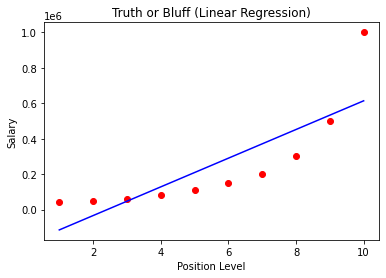

In [9]:
y_pred = lin_reg.predict(X)

plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='blue')
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results

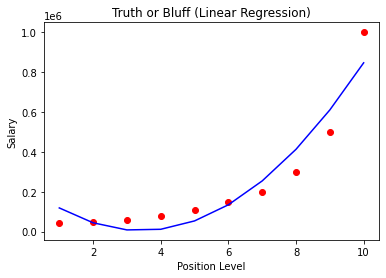

In [10]:
y_pred_p = lin_reg_2.predict(X_poly)

plt.scatter(X, y, color='red')
plt.plot(X, y_pred_p, color='blue')
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

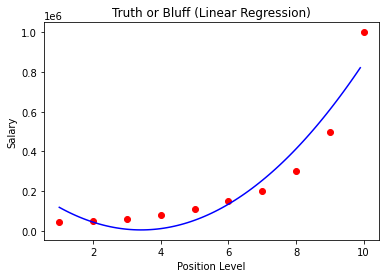

In [11]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='blue')

plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

plt.show()

## Predicting a new result with Linear Regression

In [12]:
lin_reg.predict([[6.5]])

array([[330378.78787879]])

## Predicting a new result with Polynomial Regression

In [13]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([[189498.10606061]])